In [1]:
## loading essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.feature_selection import SelectKBest
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick # for showing percentage in it

In [2]:
## loading file using pandas
data = pd.read_excel('C:\\Users\\suraj\\Downloads\\deepak\\DATA science projects\\ML projects\\custommer churn using R lang\\Telco_customer_churn.xlsx')

In [3]:
##loading data into dataframe
df=pd.DataFrame(data)
df.head(5)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
##to see rows and columns of particular data
df.shape

(7043, 33)

### Data Cleaning

In [5]:
## to see data type of dataset
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [6]:
# Total charges are in object dtype but its contains numerical values so convert into Numerical feature
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [7]:
## to cross check 
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [8]:
## to check null values count in every column.
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [9]:
## to fill null value of Total Charges column using median 
df['Total Charges'].fillna(df['Total Charges'].mean(),inplace=True)

In [10]:
## to cross check null values count
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

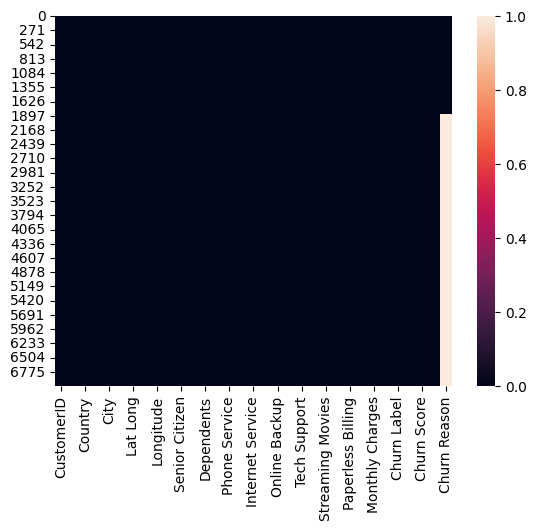

In [11]:
# to see null values in dataset by using heatmap
sb.heatmap(df.isnull()) 
plt.show()

In [12]:
## dropping unnecessary columns
df1 = df.drop(["Churn Reason", "CLTV","Churn Label", "Longitude", "Latitude", "State", "Lat Long", "Zip Code","City","Country","Count",
               "CustomerID"] ,axis='columns')

In [13]:
df1.shape

(7043, 21)

### there is two data types are present in dataset.for easy reference separate both data types in numerical and object 

In [14]:
## for numerical data types
numerical_feature = {feature for feature in df1.columns if df1[feature].dtypes != 'O'}
print(f'Count of Numerical feature: {len(numerical_feature)}')
print(f'Numerical feature are:\n {numerical_feature}')

Count of Numerical feature: 5
Numerical feature are:
 {'Churn Score', 'Total Charges', 'Churn Value', 'Monthly Charges', 'Tenure Months'}


In [15]:
# for object data feature
categorical_feature = {feature for feature in df1.columns if df1[feature].dtypes == 'O'}
print(f'Count of Categorical feature: {len(categorical_feature)}')
print(f'Categorical feature are:\n {categorical_feature}')

Count of Categorical feature: 16
Categorical feature are:
 {'Paperless Billing', 'Partner', 'Senior Citizen', 'Online Security', 'Tech Support', 'Contract', 'Streaming TV', 'Gender', 'Payment Method', 'Device Protection', 'Streaming Movies', 'Multiple Lines', 'Phone Service', 'Dependents', 'Online Backup', 'Internet Service'}


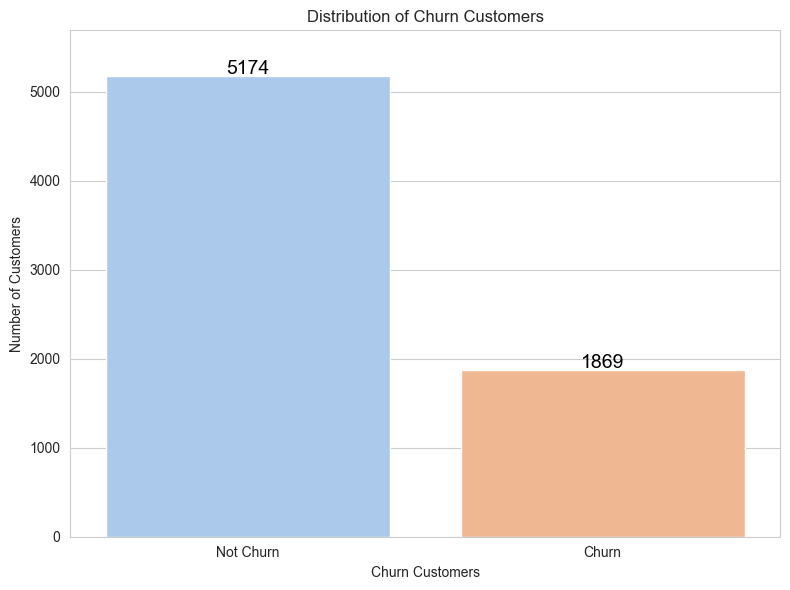

In [16]:
# to see number of customers who churned and not churned
exit_counts = df1['Churn Value'].value_counts()
exit_percentages = exit_counts


sb.set_style('whitegrid')
plt.figure(figsize=(8,6))
ax = sb.barplot(x=exit_counts.index, y=exit_counts.values, palette='pastel')
ax.set(xlabel='Churn Customers', ylabel='Number of Customers', title='Distribution of Churn Customers')
plt.xticks([0, 1], ['Not Churn', 'Churn'])
plt.ylim(top=max(exit_counts.values)*1.1)

# add counting number on top of each bar
for i, v in enumerate(exit_percentages):
    ax.text(i, exit_counts.values[i]+30, f'{v}', fontsize=14, color='black', ha='center')

plt.tight_layout()
plt.show()

#### approx 1869 customers churn

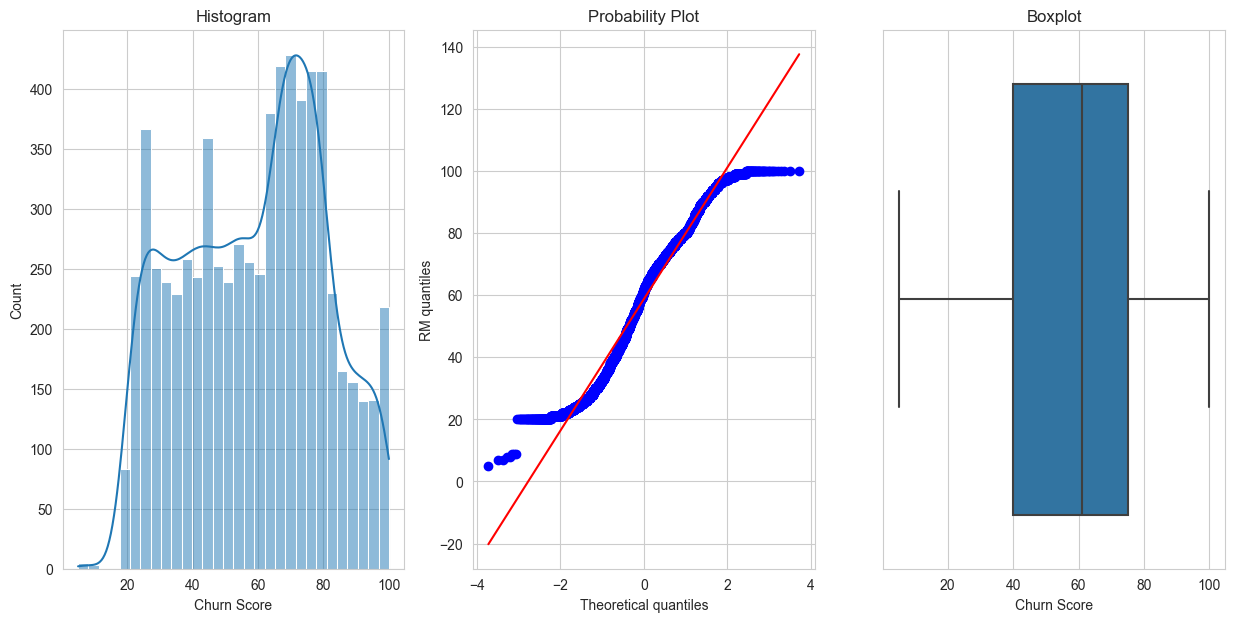

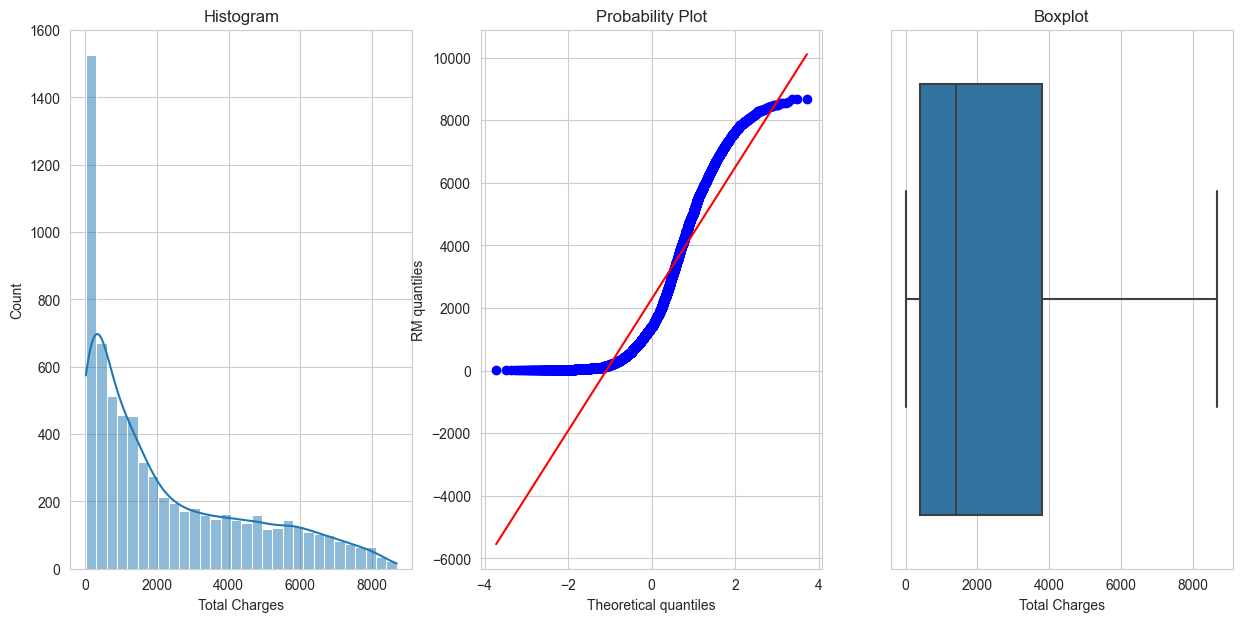

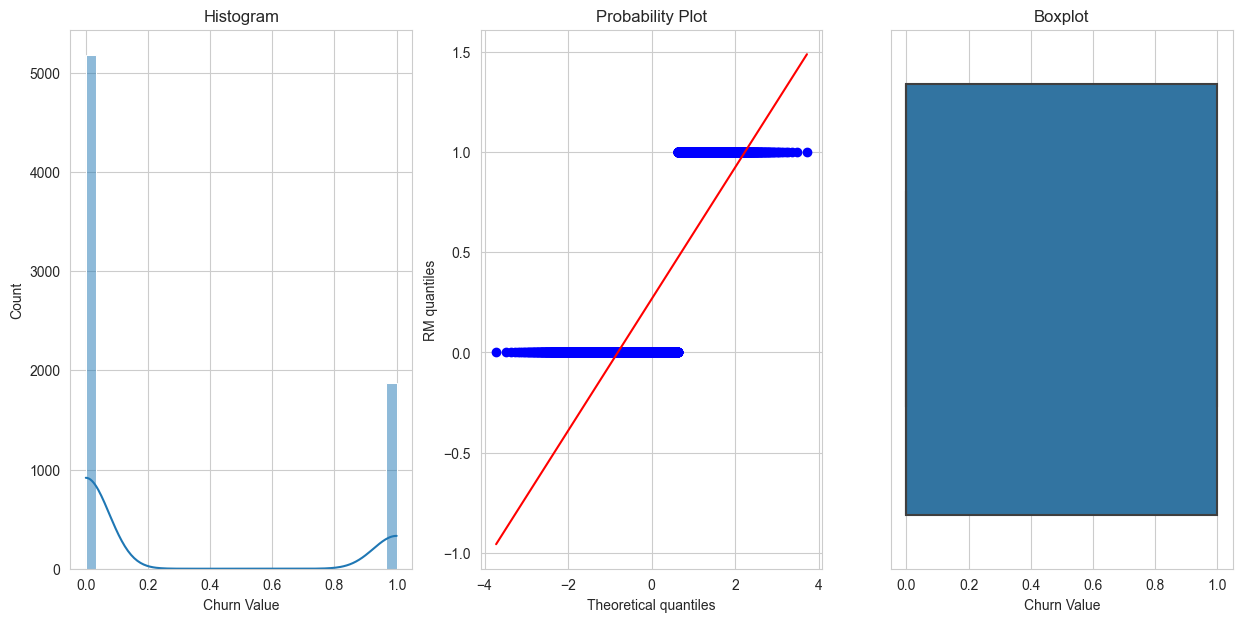

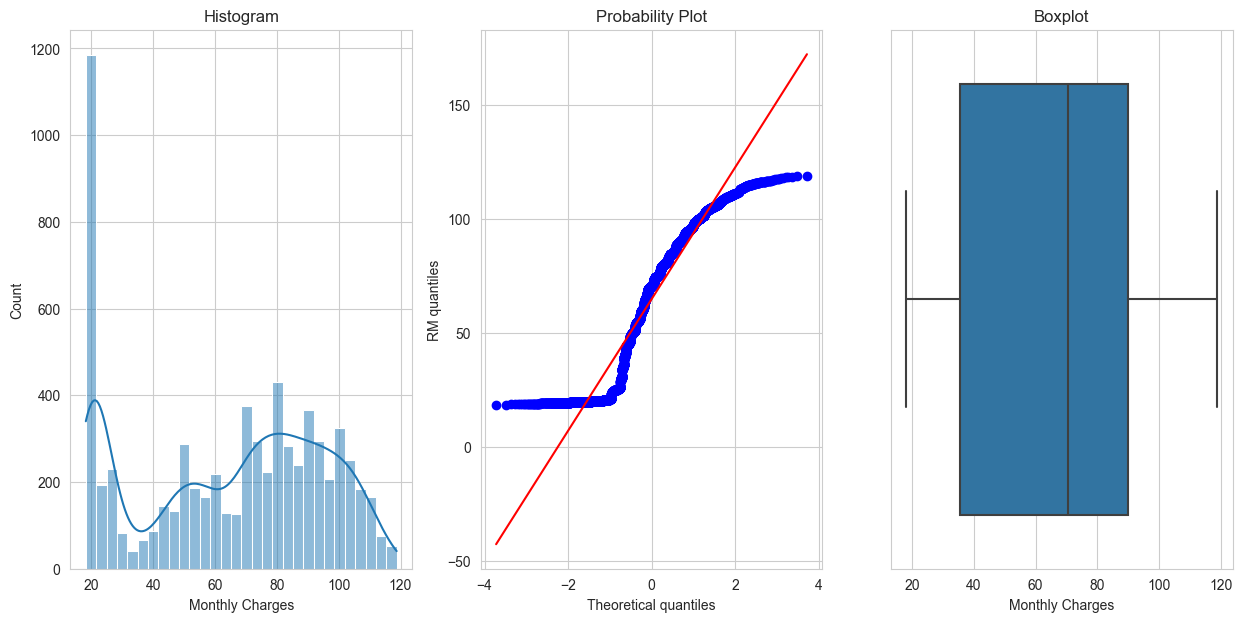

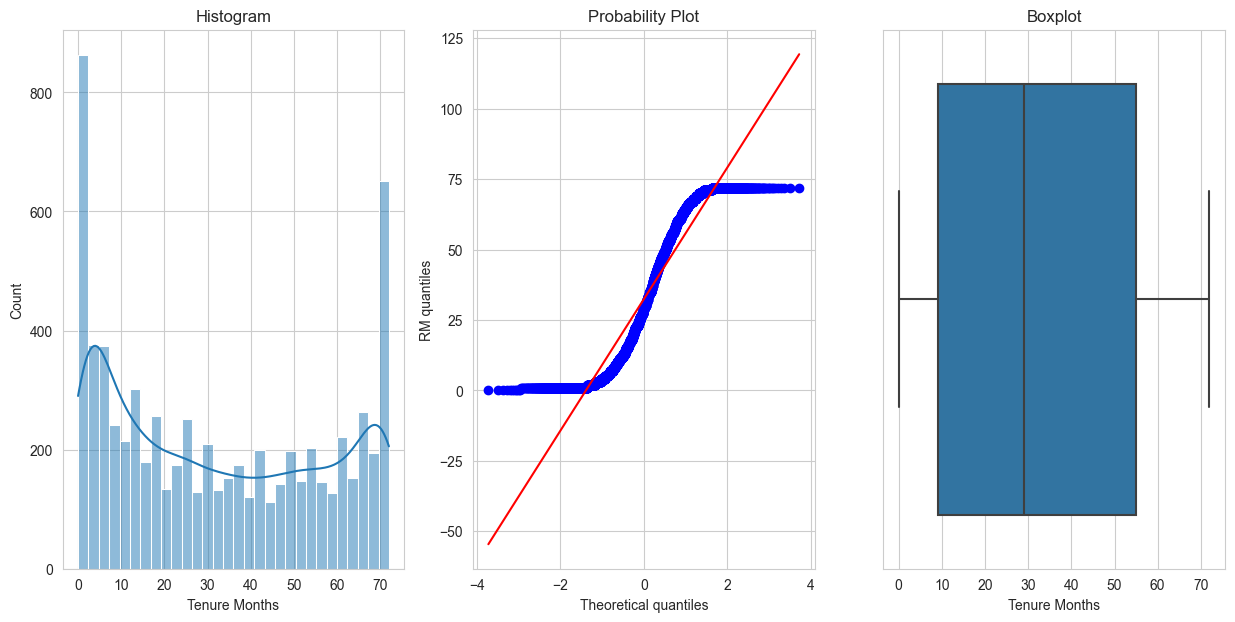

In [17]:
### Plotting numerical feature with probability distribution and checking outlier
for feature in numerical_feature:
    if feature != 'SeniorCitizen':
        plt.figure(figsize=(15,7))

        plt.subplot(1, 3, 1)
        sb.histplot(data=df1, x=feature, bins=30, kde=True)
        plt.title('Histogram')

        plt.subplot(1, 3, 2)
        stats.probplot(df1[feature], dist="norm", plot=plt)
        plt.ylabel('RM quantiles')

        plt.subplot(1, 3, 3)
        sb.boxplot(x=df1[feature])
        plt.title('Boxplot')

plt.show()

#### with the help of this graphs we can see there is no outliers so,we do not need to remove any values

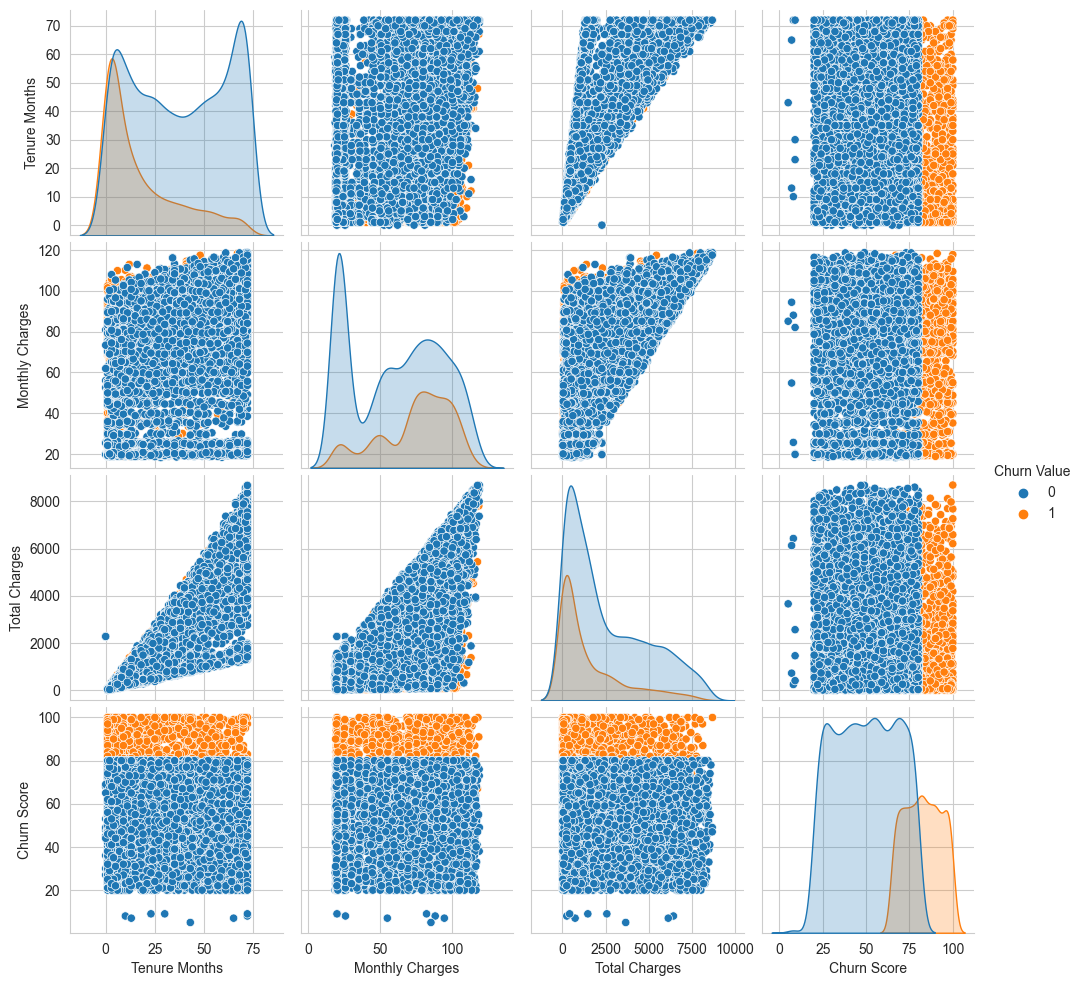

In [18]:
sb.pairplot(df1.drop(columns='Senior Citizen'),hue='Churn Value', kind='scatter')
plt.show()

Text(0.5, 1.0, '% of Senior Citizens')

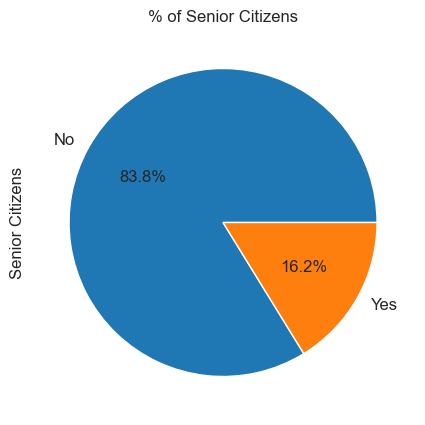

In [19]:
# visulization by pie chart for Count of Senior citizens
ax = (df1['Senior Citizen'].value_counts()*100.0 /len(df1)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

#### on the basis of this graph we can conclude there is only approx 16% customers are senior citizen and remainings are young

<Figure size 640x480 with 0 Axes>

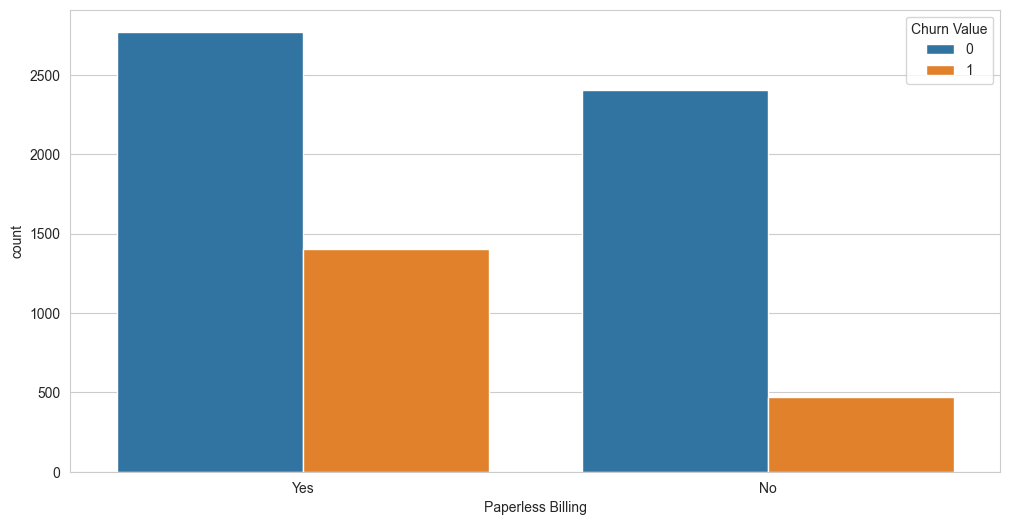

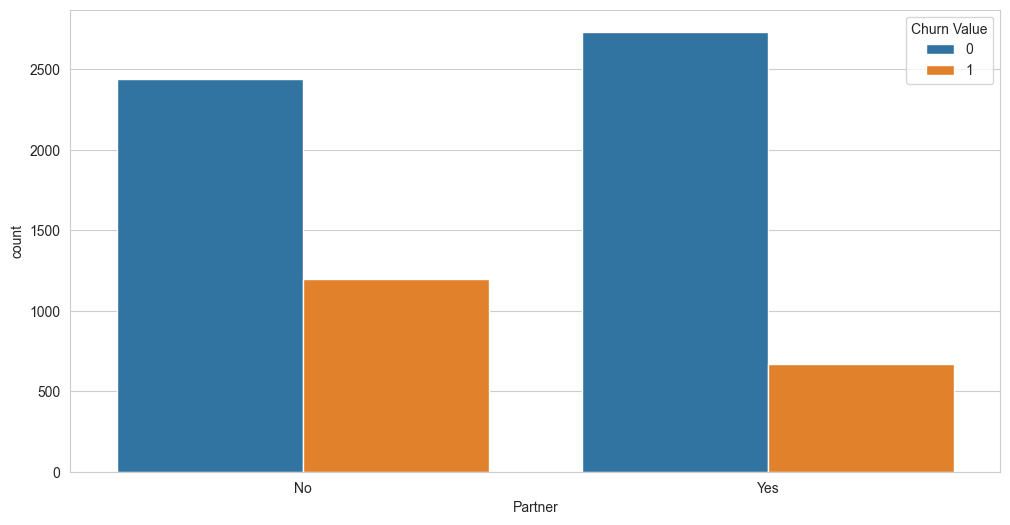

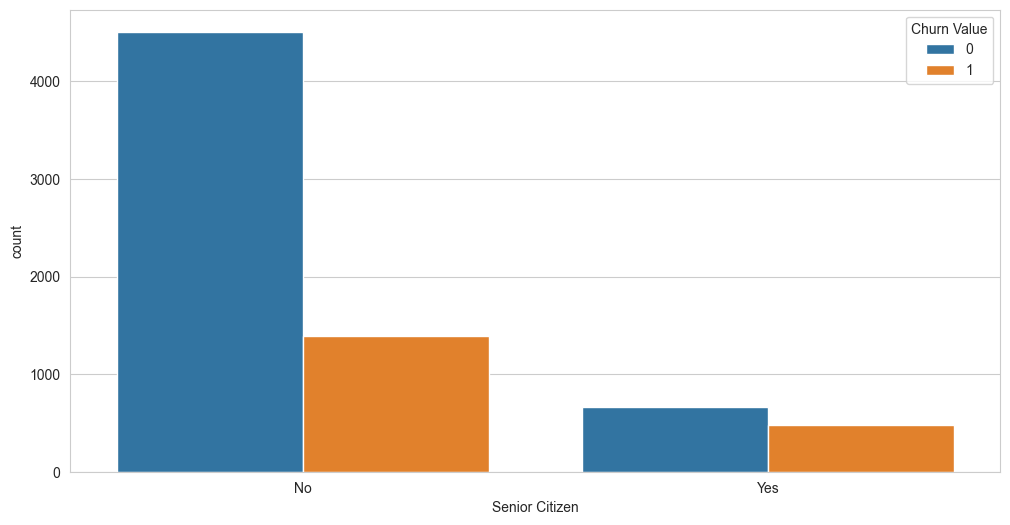

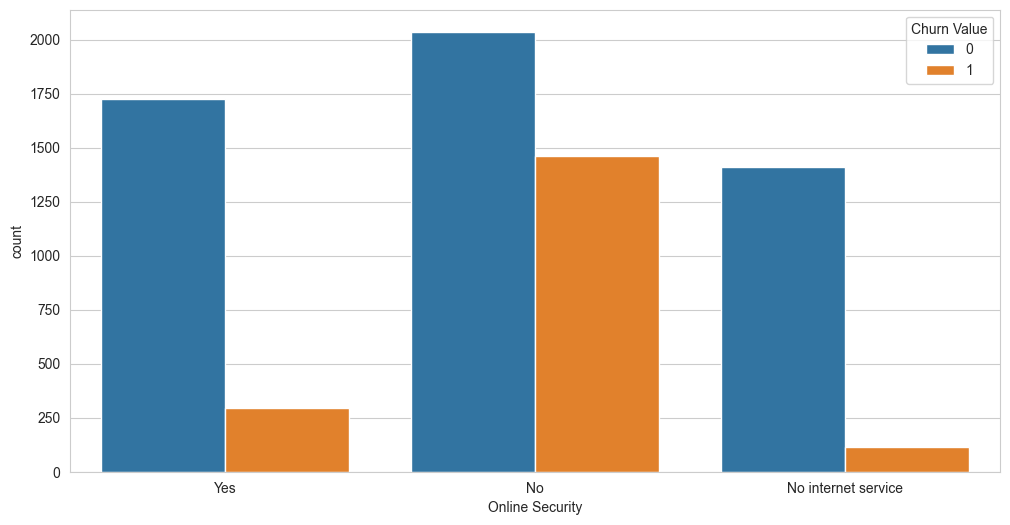

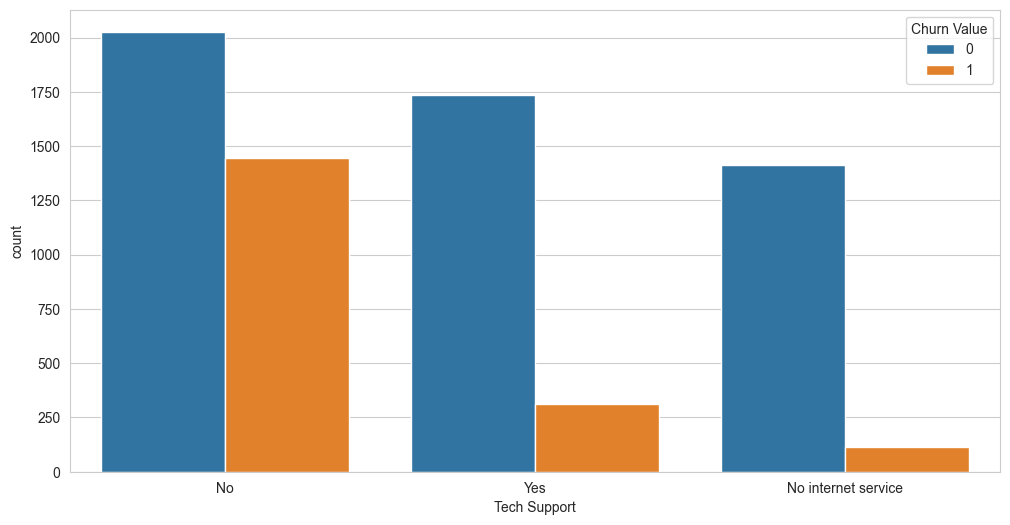

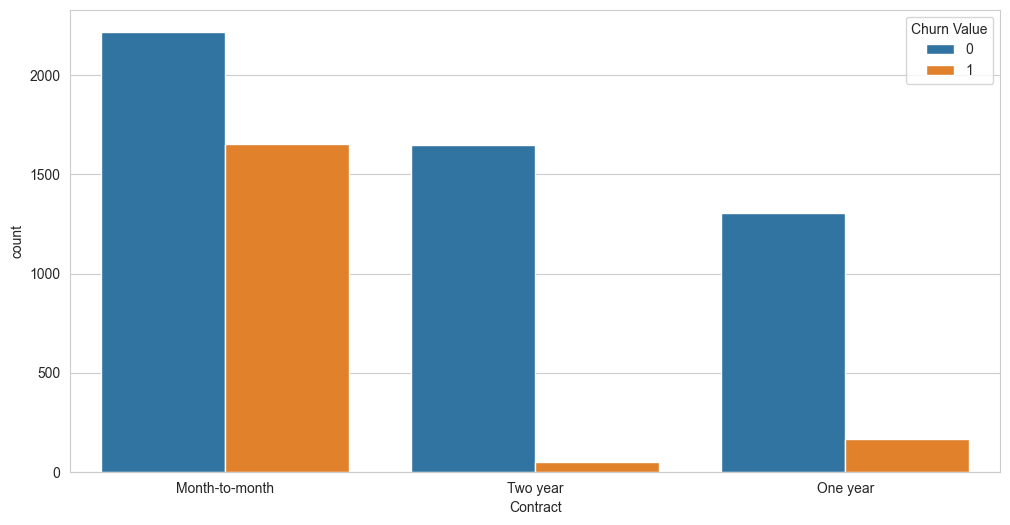

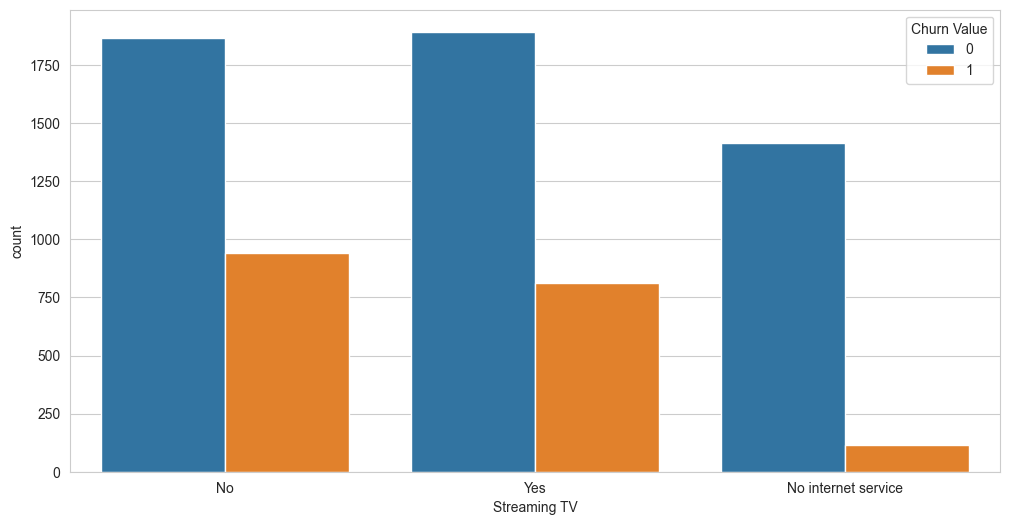

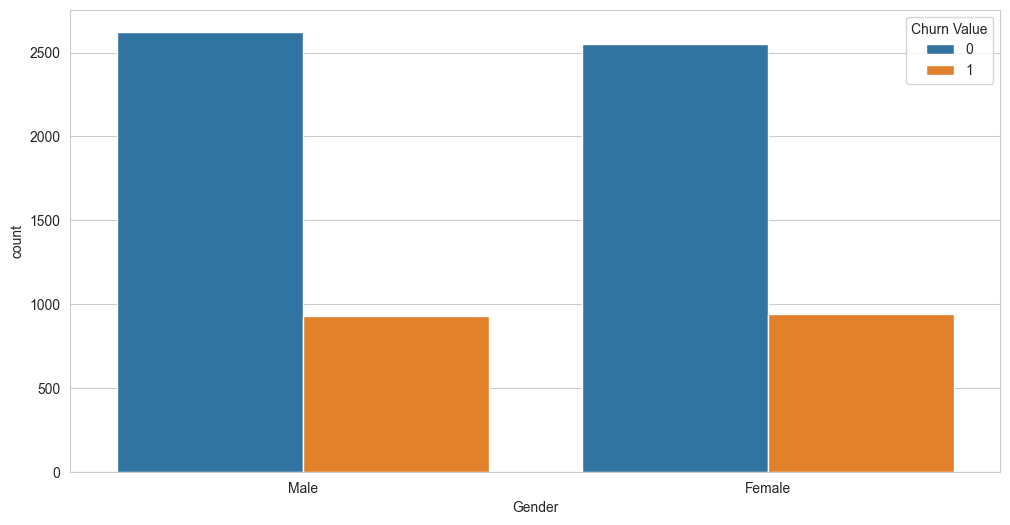

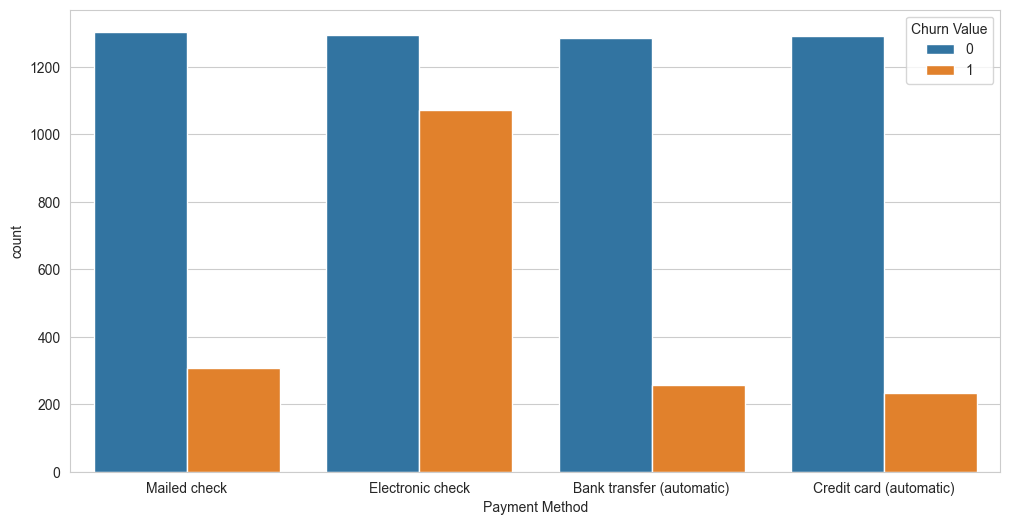

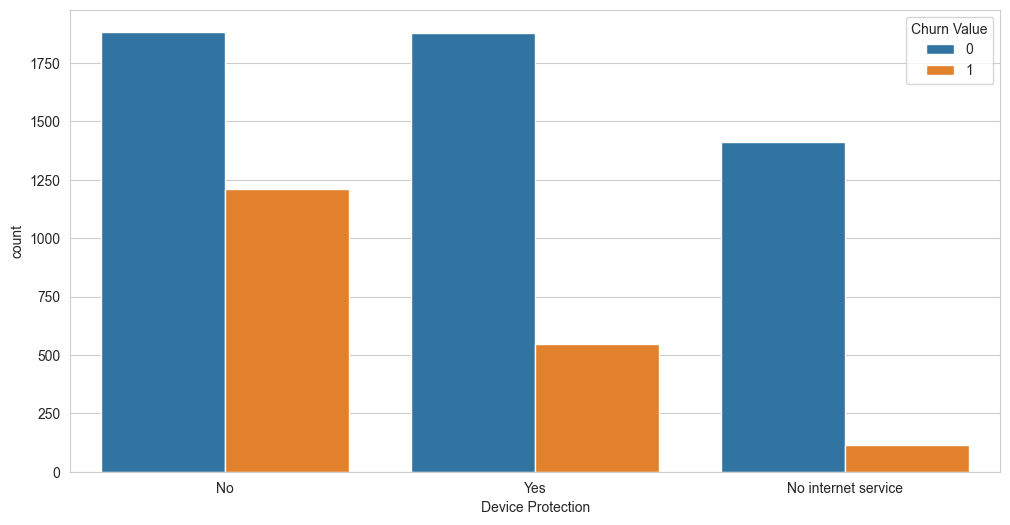

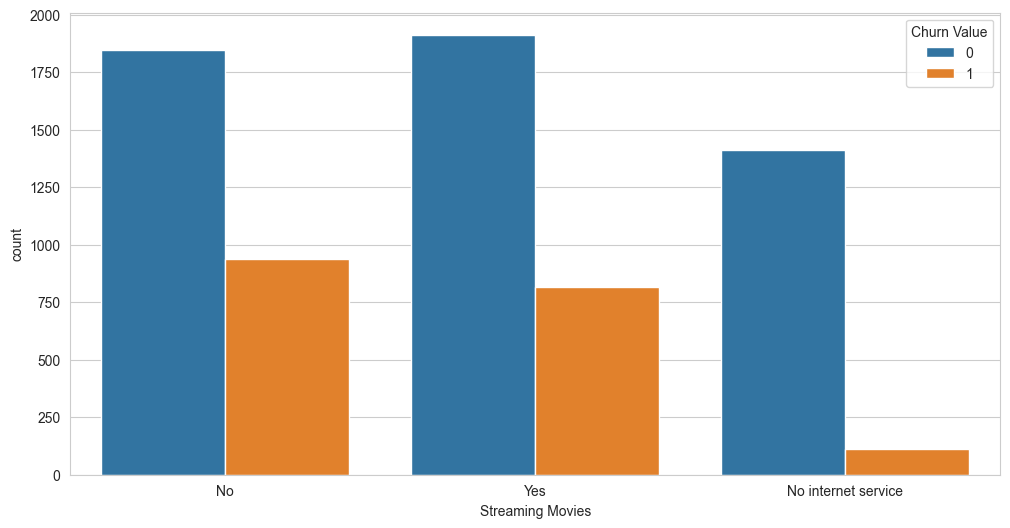

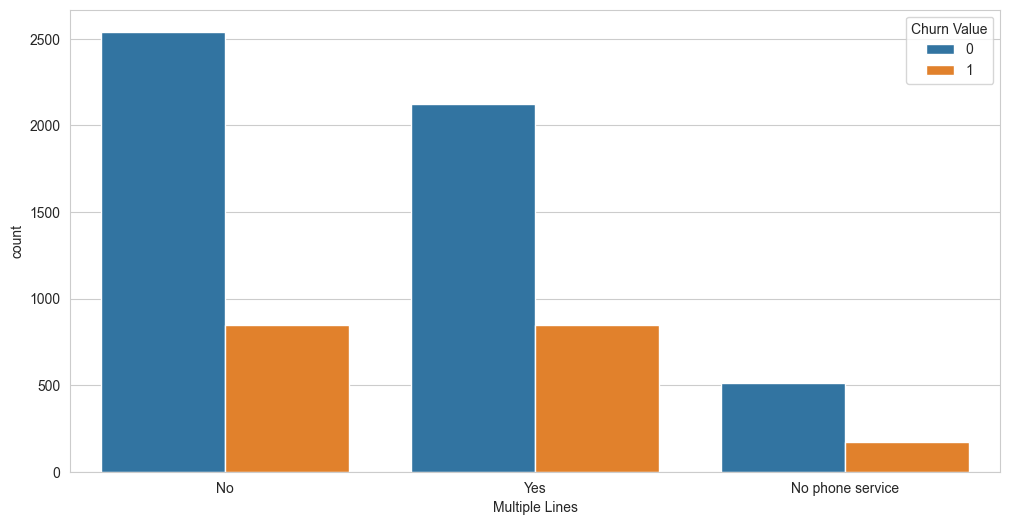

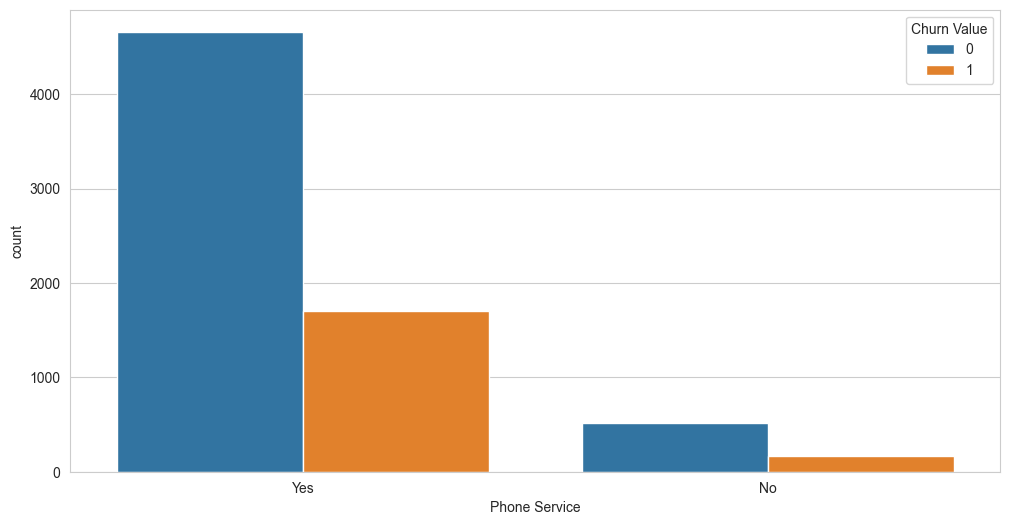

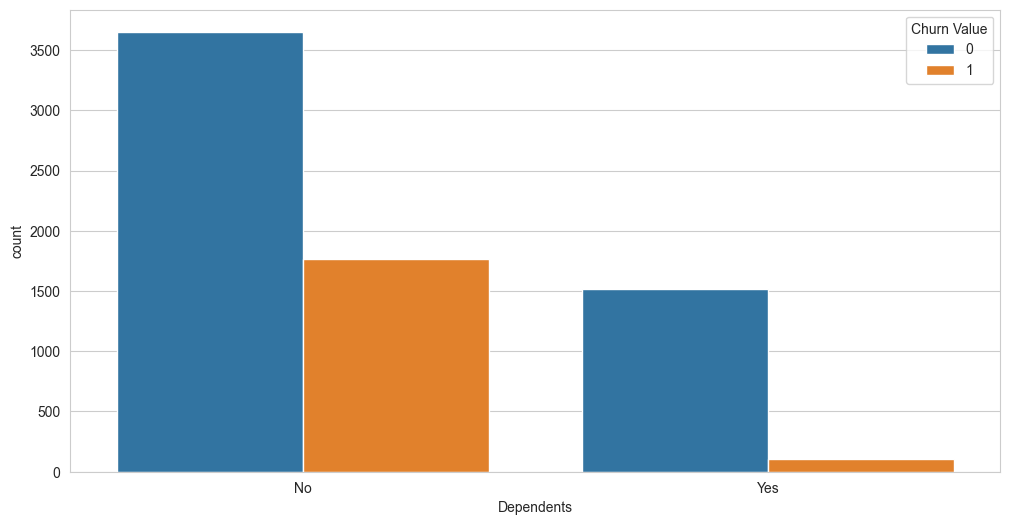

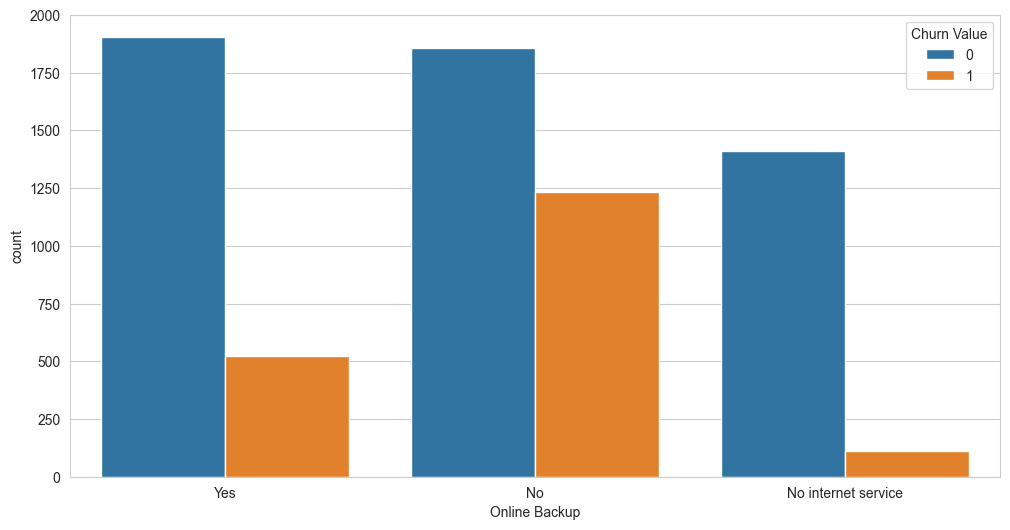

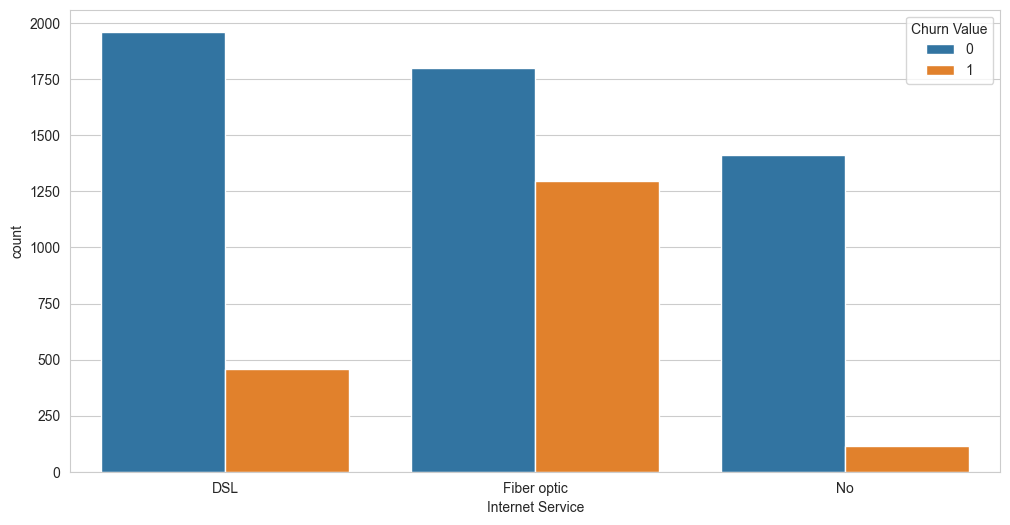

In [20]:
## churn count visulization of every dependent factors
for i, feature in enumerate(categorical_feature):
    if feature != 'TotalCharges':
        if feature != 'customerID':
            plt.figure(i)
            plt.figure(figsize=(12,6))
            sb.countplot(data=df1, x=feature, hue='Churn Value')
plt.show()

In [21]:
## converting object data type into numerical using labelencoder
encoder = LabelEncoder()
for feature in categorical_feature:
    df1[feature] = encoder.fit_transform(df1[feature])

In [22]:
## to check dataset 
df1.head(5)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score
0,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,108.15,1,86
1,0,0,0,1,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,1,67
2,0,0,0,1,8,1,2,1,0,0,...,0,2,2,0,1,2,99.65,820.50,1,86
3,0,0,1,1,28,1,2,1,0,0,...,2,2,2,0,1,2,104.80,3046.05,1,84
4,1,0,0,1,49,1,2,1,0,2,...,0,2,2,0,1,0,103.70,5036.30,1,89


<Axes: >

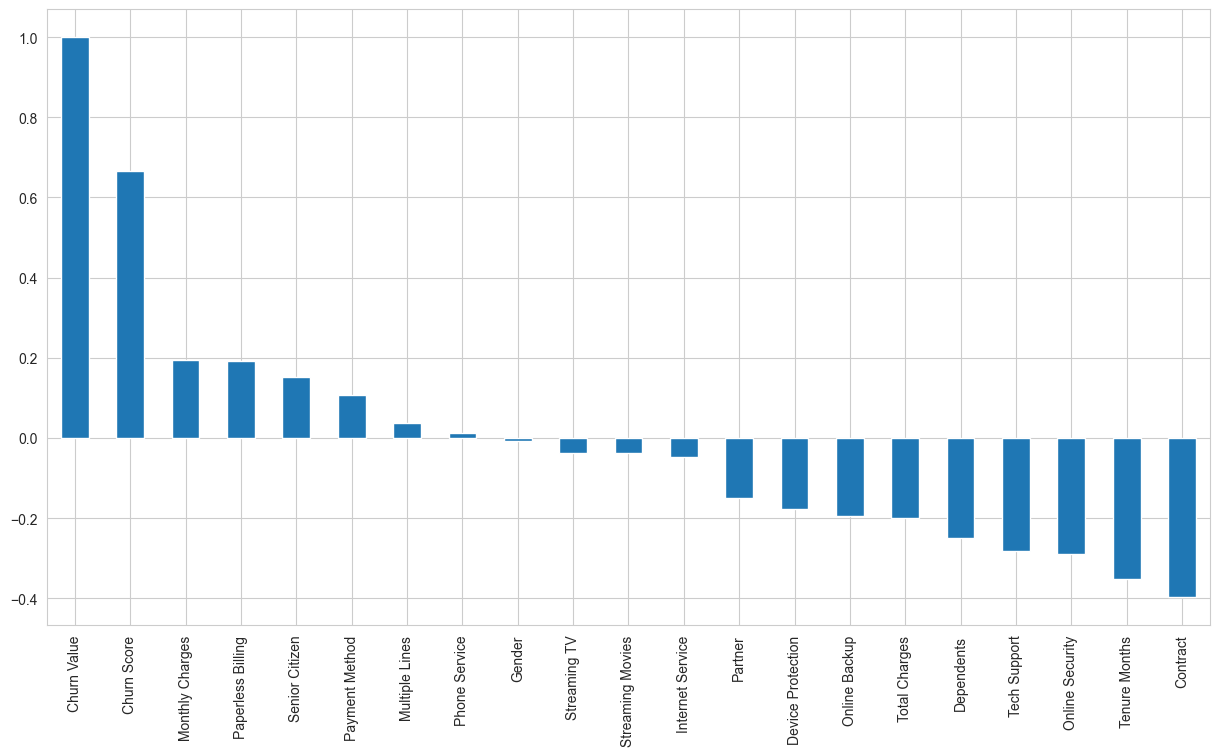

In [23]:
#to check Correlation of "Churn" with other features:
plt.figure(figsize=(15,8))
df1.corr()['Churn Value'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

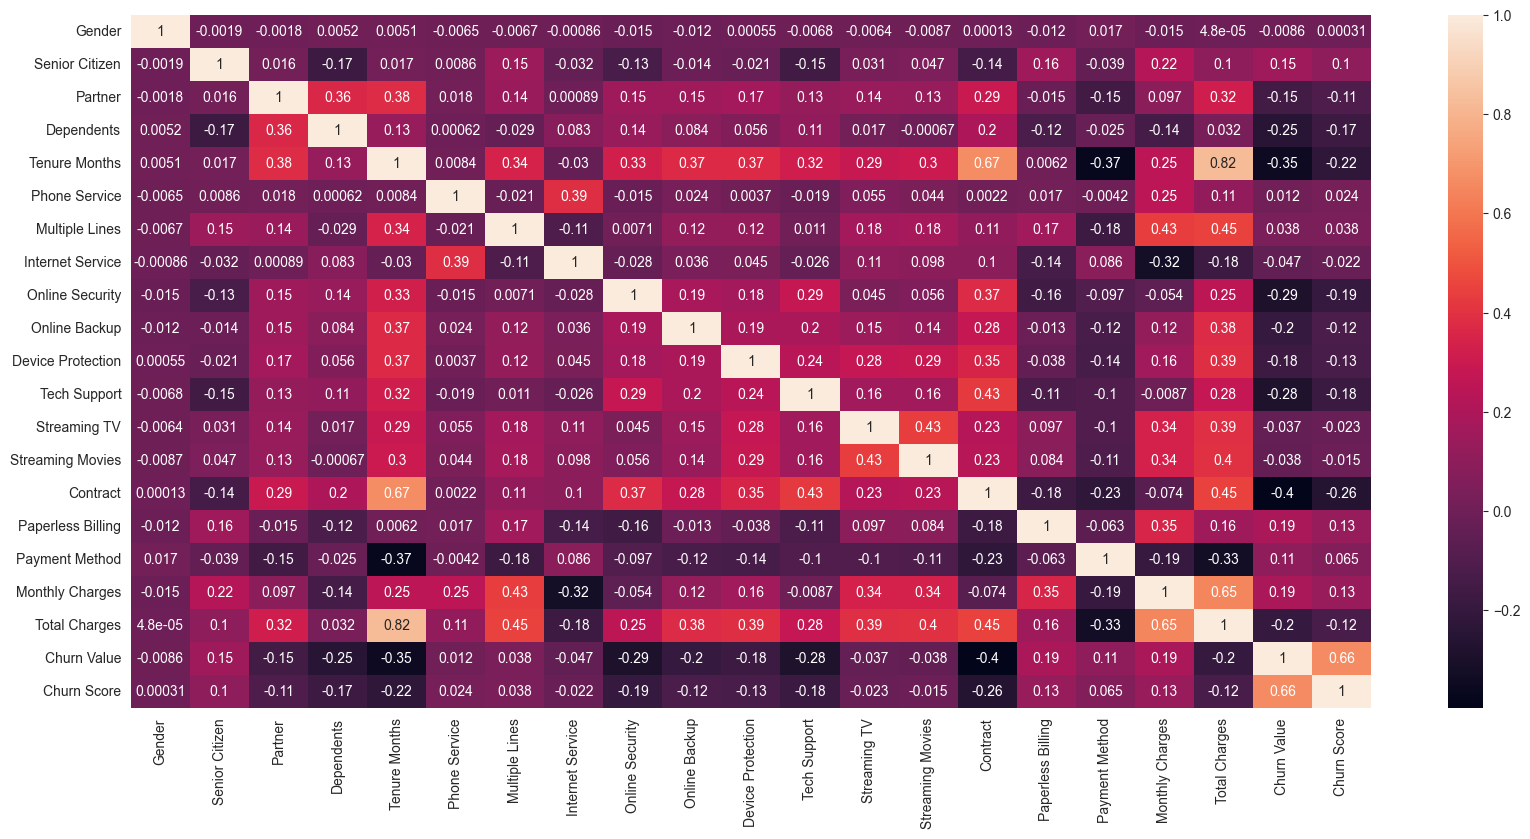

In [24]:
# Finding the correlation between the independent and dependent feature
plt.figure(figsize=(20, 9))
sb.heatmap(df1.corr(), annot=True)

In [25]:
# splitting dataset into dependent and independent feature
X = df1.drop(columns='Churn Value')
y = df1['Churn Value']

In [26]:
X.head(5)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Score
0,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,86
1,0,0,0,1,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,67
2,0,0,0,1,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,86
3,0,0,1,1,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,84
4,1,0,0,1,49,1,2,1,0,2,2,0,2,2,0,1,0,103.70,5036.30,89


In [27]:
# selects the feature which has more correlation with output(churn)
selection = SelectKBest()  # k=10 default
X = selection.fit_transform(X,y)

In [28]:
#  this will shows which feature are taken denote as True other are removed like false
selection.get_support()

array([False, False, False,  True,  True, False, False, False,  True,
        True, False,  True, False, False,  True,  True, False,  True,
        True,  True])

### According to the feature selection, we selects the 10 out of 21 features. these are the 10 features are selected [Dependents, tenure, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, Contract, PaperlessBilling, MonthlyCharges, TotalCharges]

In [29]:
# splitting dataset for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
## to cross check features count
X_train.shape

(5634, 10)

### we can now proceed with the application of machine learning algorithms

In [31]:
## logistic regression alg
Lr = LogisticRegression()
Lr.fit(X_train, y_train)
Lr_pred = Lr.predict(X_test)

print(f'Accuracy score : {accuracy_score(Lr_pred, y_test)}')
print(f'Classification report :\n {classification_report(Lr_pred, y_test)}')

Accuracy score : 0.8999290276792051
Classification report :
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      1039
           1       0.82      0.79      0.81       370

    accuracy                           0.90      1409
   macro avg       0.87      0.87      0.87      1409
weighted avg       0.90      0.90      0.90      1409



In [32]:
# Random forest classifier alg
Rfc = RandomForestClassifier()
Rfc.fit(X_train, y_train)
rfc_pred = Rfc.predict(X_test)

print(f'Accuracy score : {accuracy_score(rfc_pred, y_test)}')
print(f'Classification report :\n {classification_report(rfc_pred, y_test)}')

Accuracy score : 0.9261887863733144
Classification report :
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      1062
           1       0.84      0.87      0.85       347

    accuracy                           0.93      1409
   macro avg       0.90      0.91      0.90      1409
weighted avg       0.93      0.93      0.93      1409



In [33]:
# decisionTree Classifier alg
Dtc = DecisionTreeClassifier()
Dtc.fit(X_train, y_train)
dtc_pred = Dtc.predict(X_test)

print(f'Accuracy score : {accuracy_score(dtc_pred, y_test)}')
print(f'Classification report :\n {classification_report(dtc_pred, y_test)}')

Accuracy score : 0.9183818310858765
Classification report :
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      1045
           1       0.85      0.84      0.84       364

    accuracy                           0.92      1409
   macro avg       0.89      0.89      0.89      1409
weighted avg       0.92      0.92      0.92      1409



### As we are comparing the imbalance dataset our model are perform like okay but not a better model.to build for end to end project. So we need to over smpling data for reducing the TN, FN and increase the FP and TP for model building

In [34]:
## using smoteenn for imbalance data for better performance
st=SMOTEENN()
X_train_st,y_train_st = st.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_st)))

The number of classes before fit Counter({0: 4124, 1: 1510})
The number of classes after fit Counter({1: 3468, 0: 3251})


In [35]:
# splitting the dataset for training and testing for sampling dataset
X_train_sap, X_test_sap, y_train_sap, y_test_sap = train_test_split(X_train_st, y_train_st, test_size=0.2)

In [36]:
# decisionTree Classifier alg
Dtc_sampling = DecisionTreeClassifier()
Dtc_sampling.fit(X_train_sap, y_train_sap)
dtc_sampling_pred = Dtc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(dtc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(dtc_sampling_pred, y_test_sap)}')

Accuracy score : 0.9880952380952381
Classification report :
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       644
           1       0.99      0.99      0.99       700

    accuracy                           0.99      1344
   macro avg       0.99      0.99      0.99      1344
weighted avg       0.99      0.99      0.99      1344



In [37]:
## logistic regression alg
Lr = LogisticRegression()
Lr.fit(X_train_sap, y_train_sap)
Lr_pred = Lr.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(Lr_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(Lr_pred, y_test_sap)}')

Accuracy score : 0.9553571428571429
Classification report :
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       620
           1       0.98      0.94      0.96       724

    accuracy                           0.96      1344
   macro avg       0.95      0.96      0.96      1344
weighted avg       0.96      0.96      0.96      1344



In [38]:
# Random forest classifier alg
Rfc_sampling = RandomForestClassifier()
Rfc_sampling.fit(X_train_sap, y_train_sap)
rfc_sampling_pred = Rfc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(rfc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(rfc_sampling_pred, y_test_sap)}')

Accuracy score : 0.9880952380952381
Classification report :
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       642
           1       0.99      0.98      0.99       702

    accuracy                           0.99      1344
   macro avg       0.99      0.99      0.99      1344
weighted avg       0.99      0.99      0.99      1344



In [39]:
# GradientBoostingClassifier alg
gbc = GradientBoostingClassifier()
gbc.fit(X_train_sap, y_train_sap)
pred = gbc.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')

Accuracy score : 0.9866071428571429
Classification report :
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       640
           1       0.99      0.98      0.99       704

    accuracy                           0.99      1344
   macro avg       0.99      0.99      0.99      1344
weighted avg       0.99      0.99      0.99      1344



### After using SMOOTEENN methods to perform over sampling and down sampling with edited nearest neighbours. From this results we get bet accuraccy and TP FP ratio also increases in GradientBoostClassifier so perform HyperParameter Tunning for this model only

In [40]:
## calculating mean absolute and root mean squared error to check accuracy of particular models
Rfc_sampling = RandomForestClassifier()
Rfc_sampling.fit(X_train_sap, y_train_sap)
rfc_sampling_pred = Rfc_sampling.predict(X_test_sap)

# Calculate metrics for the Logistic Regression model
lr_mae = mean_absolute_error(y_test_sap, rfc_sampling_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test_sap, rfc_sampling_pred))
print("Logistic Regression:")
print(f'Mean Absolute Error (MAE): {lr_mae}')
print(f'Root Mean Squared Error (RMSE): {lr_rmse}')

# Create and fit a Gradient Boosting Regression model
gbc = GradientBoostingClassifier()
gbc.fit(X_train_sap, y_train_sap)
pred = gbc.predict(X_test_sap)

# Calculate metrics for the Gradient Boosting Regression model
gbm_mae = mean_absolute_error(y_test_sap, pred)
gbm_rmse = np.sqrt(mean_squared_error(y_test_sap, pred))
print("\nGradient Boosting Regression:")
print(f'Mean Absolute Error (MAE): {gbm_mae}')
print(f'Root Mean Squared Error (RMSE): {gbm_rmse}')

Logistic Regression:
Mean Absolute Error (MAE): 0.011160714285714286
Root Mean Squared Error (RMSE): 0.10564428184106457

Gradient Boosting Regression:
Mean Absolute Error (MAE): 0.013392857142857142
Root Mean Squared Error (RMSE): 0.11572751247156893


### Recommendations:After Oversampling the dataset our model performs is pretty good. From our choosen model GradientBoostClassifier and randomforestclassifier performs better than all. So we can choose any one from this two classifier for this dataset prediction.In this dataset monthly charges has a posiitve correlation with churn,so monthly charges play an important features in predecting the churn.